<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_1_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80(%D0%9A%D0%BE%D0%BD%D1%8E%D1%88%D0%BE%D0%BA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Light: Вариант 1

Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:
1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание нейронной сети.
5. Обучение нейронной сети.
Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.

## 1. Импорт библиотек

In [1]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой Mnist
from tensorflow.keras import utils              # Утилиты для to_categorical
from tensorflow.keras.models import Sequential  # Класс создания модели Sequential
from tensorflow.keras.layers import Dense       # Класс Dense - полносвязный слой

# Для графики:
import matplotlib.pyplot as plt 
from PIL import Image 

import numpy as np  # Кудаж без него

# Добавил от себя автоматическую остановку обученя нейронки после того, как начинается обратный эффект )
from tensorflow.keras.callbacks import EarlyStopping

## 2. Загрузка базы mnist

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() # Загрузка данных Mnist

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#x_train_org[0]  # Можно посмотреть массив с данными

In [ ]:
#y_train_org[0]  # Метки ответов (от 0 до 9: какая цифра изображена на соответствующей картинке в массиве x_train_org)

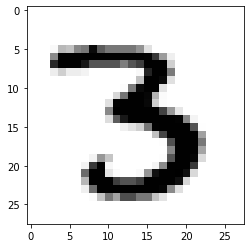

In [3]:
# Можно посмотреть на рисунок цифры по номеру
n = 12 #Номер картинки
plt.imshow(x_train_org[n], cmap='Greys') #Отрисовка картинки
plt.show() # Вывод картинки
#plt.imshow(x_train_org[n+1], cmap='Greys') #Отрисовка картинки
#plt.show() # Вывод картинки

## 3. Нормирование и преобразование x_train и y_train

In [4]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)  # Массив для обучения
print(x_test_org.shape) # Массив для проверки качества обучения

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [6]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [7]:
#Выводим размер y_train
print(y_train.shape)  # 60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train[4]) # Выводим пример одного выходного вектора

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 4. Создание нейронной сети

In [8]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой 
# на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов 
#с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем ВЫХОДНОЙ слой на 10 нейронов 
# с softmax-активацией. 
# Эта функция преобразует все 10 значений выходного слоя таким образом, что сумма значений будет равна 1
# получим 10 значений, соответствующих вероятностям, с которыми модель определила ту или иную цифру

In [9]:
# Компилируем модель
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"]) 

print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## 5. Обучение нейронной сети

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

#Прекращение обучения, когда параметр val_loss перестает улучшаться - не удержался ))
#часа два разбирался с тем, как остановить перебор ))

early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience=2, # Число эпох, в течении которых должен ухудшаться val_loss
                               restore_best_weights = True)

# fit - функция обучения нейронки
model.fit(x_train, y_train, # x_train, y_train - обучающая выборка, входные и выходные данные
          batch_size=128, # batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15, # epochs - количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1, # verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
          validation_split=0.2, 
          callbacks=[early_stopping])


Epoch 1/15
375/375 [==============================] - 7s 19ms/step - loss: 0.2333 - accuracy: 0.9302 - val_loss: 0.1070 - val_accuracy: 0.9676
Epoch 2/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0804 - accuracy: 0.9756 - val_loss: 0.0993 - val_accuracy: 0.9711
Epoch 3/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0511 - accuracy: 0.9836 - val_loss: 0.0847 - val_accuracy: 0.9748
Epoch 4/15
375/375 [==============================] - 7s 19ms/step - loss: 0.0362 - accuracy: 0.9883 - val_loss: 0.0770 - val_accuracy: 0.9778
Epoch 5/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0251 - accuracy: 0.9917 - val_loss: 0.0799 - val_accuracy: 0.9775
Epoch 6/15
375/375 [==============================] - 7s 20ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.1024 - val_accuracy: 0.9763


In [ ]:
# После 5й эпохи показатели обучения нейронки ОБЫЧНО начинают "колбасить"

## 6. Проверка обученности сети + кое что от себя

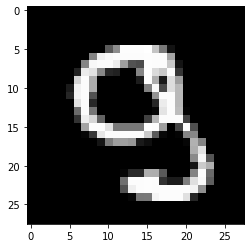

In [11]:
n_rec = 151 #Номер тестовой цифры, которую будем распознавать (для примера взял специально одну из ошибок распознавания

import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений

plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [12]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [13]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера

import numpy as np  #знаю, что не надо второй раз импоортировать, но, кажется, правильнее подключать модули по ходу их надобности, а не сразу?

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [15]:
prediction = model.predict(x) #Распознаём наш пример
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента 
#(это итоговая цифра, которую распознала сеть)
print('Ответ нейросети: ' , prediction)
print('Правильный ответ: ' , y_test_org[n_rec])

Ответ нейросети:  8
Правильный ответ:  9


In [16]:
# От себя добавил цикл для распознавания всех тестовых вариантов и вывода картинок - ошибок распознавания
# До этого заметил, что если вовремя не остановить модель, то ошибок распознавания все больше и больше...

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i]
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x) # Распознаём наш пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Индекс:  151 Ответ нейросети:  8 	 Правильный ответ:  9
Индекс:  1681 Ответ нейросети:  7 	 Правильный ответ:  3
Индекс:  2266 Ответ нейросети:  8 	 Правильный ответ:  1
Индекс:  3451 Ответ нейросети:  3 	 Правильный ответ:  7
Индекс:  4966 Ответ нейросети:  8 	 Правильный ответ:  7
Индекс:  6166 Ответ нейросети:  3 	 Правильный ответ:  9
Индекс:  7216 Ответ нейросети:  3 	 Правильный ответ:  0
Counter({'True': 660, 'False': 7})


# Light: Вариант 2
Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.

## 1. Поменяйте количество нейронов в сети
Используя следующие значения: слои по 5000, 100 и 10 нейронов

In [17]:
# Создаю нейронную сеть
model_10_100_5000 = Sequential() # Срздание сети
model_10_100_5000.add(Dense(5000, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 10 нейронов с relu-активацией
model_10_100_5000.add(Dense(100, activation="relu")) # Добавляем полносвязный слой на 100 нейронов с relu-активацией
model_10_100_5000.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 5000 нейронов с softmax-активацией

In [18]:
# Компилируем модель
model_10_100_5000.compile(loss="categorical_crossentropy", 
                          optimizer="adam", 
                          metrics=["accuracy"]) 

print(model_10_100_5000.summary()) #Вывод структуры модели

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5000)              3925000   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               500100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 4,426,110
Trainable params: 4,426,110
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Обучение нейронной сети
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights = True)
model_10_100_5000.fit(x_train, y_train, 
                      batch_size=128, 
                      epochs=15, verbose=1, 
                      validation_split=0.2, 
                      callbacks=[early_stopping])


Epoch 1/15
375/375 [==============================] - 27s 72ms/step - loss: 0.2031 - accuracy: 0.9376 - val_loss: 0.1164 - val_accuracy: 0.9653
Epoch 2/15
375/375 [==============================] - 27s 72ms/step - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.0991 - val_accuracy: 0.9706
Epoch 3/15
375/375 [==============================] - 27s 71ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0850 - val_accuracy: 0.9760
Epoch 4/15
375/375 [==============================] - 26s 71ms/step - loss: 0.0336 - accuracy: 0.9890 - val_loss: 0.0914 - val_accuracy: 0.9756
Epoch 5/15
375/375 [==============================] - 26s 71ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0831 - val_accuracy: 0.9782
Epoch 6/15
375/375 [==============================] - 27s 71ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0990 - val_accuracy: 0.9752
Epoch 7/15
375/375 [==============================] - 27s 72ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0959 - val_accuracy:

In [20]:
# ПРОВЕРКА

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i] #Выбираем нужную картинку из тестовой выборки
  x = np.expand_dims(x, axis=0) #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
  prediction = model_10_100_5000.predict(x) # Распознаём пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Индекс:  646 Ответ нейросети:  6 	 Правильный ответ:  2
Индекс:  691 Ответ нейросети:  4 	 Правильный ответ:  8
Индекс:  1156 Ответ нейросети:  8 	 Правильный ответ:  7
Индекс:  1621 Ответ нейросети:  6 	 Правильный ответ:  0
Индекс:  1681 Ответ нейросети:  7 	 Правильный ответ:  3
Индекс:  2266 Ответ нейросети:  6 	 Правильный ответ:  1
Индекс:  3451 Ответ нейросети:  9 	 Правильный ответ:  7
Индекс:  3601 Ответ нейросети:  4 	 Правильный ответ:  1
Индекс:  3796 Ответ нейросети:  8 	 Правильный ответ:  2
Индекс:  3811 Ответ нейросети:  0 	 Правильный ответ:  2
Индекс:  5926 Ответ нейросети:  9 	 Правильный ответ:  4
Индекс:  6166 Ответ нейросети:  3 	 Правильный ответ:  9
Индекс:  6571 Ответ нейросети:  7 	 Правильный ответ:  9
Индекс:  7216 Ответ нейросети:  6 	 Правильный ответ:  0
Индекс:  7921 Ответ нейросети:  0 	 Правильный ответ:  8
Индекс:  8311 Ответ нейросети:  4 	 Правильный ответ:  6
Counter({'True': 651, 'False': 16})


### Вывод: 
1.   если первый слой увеличить с 800 нейронов до 5000, то увеличивается период обучения (изза роста числа Total params в 4,5 раза!!, при сопоставимом качестве
2.   влияние уменьшения второго слоя с 400 до 100 пока не понятно

## 2. Поменяйте активационную функцию в скрытых слоях с relu на linear.

In [21]:
# Создаю нейронную сеть
model_linear = Sequential() # Срздание сети
model_linear.add(Dense(800, input_dim=784, activation="linear")) 
model_linear.add(Dense(400, activation="linear")) 
model_linear.add(Dense(10, activation="softmax")) 

In [22]:
# Компилируем модель
model_linear.compile(loss="categorical_crossentropy", 
                          optimizer="adam", 
                          metrics=["accuracy"]) 

print(model_linear.summary()) # Вывод структуры модели

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Обучение нейронной сети
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights = True)
model_linear.fit(x_train, y_train, 
                      batch_size=128, 
                      epochs=15, verbose=1, 
                      validation_split=0.2, 
                      callbacks=[early_stopping])

Epoch 1/15
375/375 [==============================] - 7s 19ms/step - loss: 0.4053 - accuracy: 0.8836 - val_loss: 0.3258 - val_accuracy: 0.9070
Epoch 2/15
375/375 [==============================] - 7s 19ms/step - loss: 0.3381 - accuracy: 0.9065 - val_loss: 0.3144 - val_accuracy: 0.9119
Epoch 3/15
375/375 [==============================] - 7s 19ms/step - loss: 0.3159 - accuracy: 0.9124 - val_loss: 0.3240 - val_accuracy: 0.9084
Epoch 4/15
375/375 [==============================] - 7s 19ms/step - loss: 0.3128 - accuracy: 0.9107 - val_loss: 0.3005 - val_accuracy: 0.9147
Epoch 5/15
375/375 [==============================] - 7s 19ms/step - loss: 0.3020 - accuracy: 0.9151 - val_loss: 0.2893 - val_accuracy: 0.9207
Epoch 6/15
375/375 [==============================] - 7s 19ms/step - loss: 0.2983 - accuracy: 0.9168 - val_loss: 0.3029 - val_accuracy: 0.9155
Epoch 7/15
375/375 [==============================] - 7s 19ms/step - loss: 0.2962 - accuracy: 0.9157 - val_loss: 0.2975 - val_accuracy: 0.9183

In [24]:
# ПРОВЕРКА

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i] #Выбираем нужную картинку из тестовой выборки
  x = np.expand_dims(x, axis=0) #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
  prediction = model_linear.predict(x) # Распознаём пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
#    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Counter({'True': 617, 'False': 50})


### Вывод:
1.   Активационная функция Linear плохо подходит для решения данной задачи
2.   Для работы с нейронками, конечно, можно просто подбирать руками разные параметры и акцивационные функции, но НЕОБХОДИМО РАЗБИРАТЬСЯ В РАБОТЕ КАЖДОГО МЕТОДА И ЗНАТЬ ТЕОРИЮ!! - это существенно ускорит работу по построению и обучению сете



## 3. Поменяйте размеры batch_size:




###   batch_size = 1

In [25]:
# Создаю нейронную сеть
model_batch_size1 = Sequential() # Создание сети
model_batch_size1.add(Dense(800, input_dim=784, activation="relu")) 
model_batch_size1.add(Dense(400, activation="relu")) 
model_batch_size1.add(Dense(10, activation="softmax")) 

In [26]:
# Компилируем модель
model_batch_size1.compile(loss="categorical_crossentropy", 
                          optimizer="adam", 
                          metrics=["accuracy"]) 

print(model_batch_size1.summary()) # Вывод структуры модели

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# Обучение нейронной сети
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights = True)
model_batch_size1.fit(x_train, y_train, 
                      batch_size=1,     # Поменял со 128 на 1
                      epochs=15, verbose=1, 
                      validation_split=0.2, 
                      callbacks=[early_stopping])

Epoch 1/15
48000/48000 [==============================] - 258s 5ms/step - loss: 0.2904 - accuracy: 0.9218 - val_loss: 0.2104 - val_accuracy: 0.9485
Epoch 2/15
48000/48000 [==============================] - 259s 5ms/step - loss: 0.1868 - accuracy: 0.9570 - val_loss: 0.2468 - val_accuracy: 0.9456
Epoch 3/15
48000/48000 [==============================] - 268s 6ms/step - loss: 0.1664 - accuracy: 0.9644 - val_loss: 0.2522 - val_accuracy: 0.9656


In [28]:
# ПРОВЕРКА

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i] #Выбираем нужную картинку из тестовой выборки
  x = np.expand_dims(x, axis=0) #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
  prediction = model_batch_size1.predict(x) # Распознаём пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
#    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Counter({'True': 637, 'False': 30})


### Вывод batch_size = 1:
1.   Скорость выполнения - снизилась очень сильно! в 31 раз! увеличение размера батча позволяет ускорить обучение нейронки
2.   Качество обучения тоже никуда не годится
3.   Очень было бы удобно загнать модуль проверки в функцию, но не смог придумать как ((



###   batch_size = 10



In [29]:
# Создаю нейронную сеть
model_batch_size10 = Sequential() # Создание сети
model_batch_size10.add(Dense(800, input_dim=784, activation="relu")) 
model_batch_size10.add(Dense(400, activation="relu")) 
model_batch_size10.add(Dense(10, activation="softmax")) 

In [30]:
# Компилируем модель
model_batch_size10.compile(loss="categorical_crossentropy", 
                          optimizer="adam", 
                          metrics=["accuracy"]) 

print(model_batch_size10.summary()) # Вывод структуры модели

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# Обучение нейронной сети
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights = True)
model_batch_size10.fit(x_train, y_train, 
                      batch_size=10,     # Поменял со 128 на 10
                      epochs=15, verbose=1, 
                      validation_split=0.2, 
                      callbacks=[early_stopping])

Epoch 1/15
4800/4800 [==============================] - 37s 8ms/step - loss: 0.2047 - accuracy: 0.9373 - val_loss: 0.1203 - val_accuracy: 0.9633
Epoch 2/15
4800/4800 [==============================] - 36s 8ms/step - loss: 0.0981 - accuracy: 0.9704 - val_loss: 0.1223 - val_accuracy: 0.9669
Epoch 3/15
4800/4800 [==============================] - 36s 8ms/step - loss: 0.0742 - accuracy: 0.9775 - val_loss: 0.1196 - val_accuracy: 0.9678
Epoch 4/15
4800/4800 [==============================] - 36s 7ms/step - loss: 0.0569 - accuracy: 0.9832 - val_loss: 0.1189 - val_accuracy: 0.9742
Epoch 5/15
4800/4800 [==============================] - 39s 8ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.1298 - val_accuracy: 0.9747
Epoch 6/15
4800/4800 [==============================] - 42s 9ms/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.1186 - val_accuracy: 0.9746
Epoch 7/15
4800/4800 [==============================] - 36s 8ms/step - loss: 0.0394 - accuracy: 0.9889 - val_loss: 0.1452 - val_ac

In [32]:
# ПРОВЕРКА

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i] #Выбираем нужную картинку из тестовой выборки
  x = np.expand_dims(x, axis=0) #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
  prediction = model_batch_size10.predict(x) # Распознаём пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
#    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Counter({'True': 652, 'False': 15})


### Вывод batch_size = 10:
1.   Видимо, число батчей как-то влияет на качество обучения. нужно учить матчасть
2.   Очень было бы удобно загнать модуль проверки в функцию, но не смог придумать как ((



###   batch_size = 100



In [43]:
# Создаю нейронную сеть
model_batch_size100 = Sequential() # Срздание сети
model_batch_size100.add(Dense(800, input_dim=784, activation="relu")) 
model_batch_size100.add(Dense(400, activation="relu")) 
model_batch_size100.add(Dense(10, activation="softmax")) 

In [44]:
# Компилируем модель
model_batch_size100.compile(loss="categorical_crossentropy", 
                          optimizer="adam", 
                          metrics=["accuracy"]) 

print(model_batch_size100.summary()) # Вывод структуры модели

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_22 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
# Обучение нейронной сети
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights = True)
model_batch_size100.fit(x_train, y_train, 
                      batch_size=100,     # Поменял со 128 на 100
                      epochs=15, verbose=1, 
                      validation_split=0.2, 
                      callbacks=[early_stopping])

Epoch 1/15
480/480 [==============================] - 8s 16ms/step - loss: 0.2228 - accuracy: 0.9329 - val_loss: 0.1120 - val_accuracy: 0.9663
Epoch 2/15
480/480 [==============================] - 8s 16ms/step - loss: 0.0823 - accuracy: 0.9745 - val_loss: 0.0975 - val_accuracy: 0.9699
Epoch 3/15
480/480 [==============================] - 8s 16ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 4/15
480/480 [==============================] - 8s 16ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0862 - val_accuracy: 0.9753
Epoch 5/15
480/480 [==============================] - 8s 16ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.0851 - val_accuracy: 0.9772


In [46]:
# ПРОВЕРКА

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i] #Выбираем нужную картинку из тестовой выборки
  x = np.expand_dims(x, axis=0) #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
  prediction = model_batch_size100.predict(x) # Распознаём пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
#    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Counter({'True': 650, 'False': 17})


### Вывод batch_size = 100:
1.   Сопоставимо с первоначальным вариантом. На секунду дольше
2.   Очень было бы удобно загнать модуль проверки в функцию, но не смог придумать как ((



###   batch_size = 60000



In [37]:
# Создаю нейронную сеть
model_batch_size60000 = Sequential() # Срздание сети
model_batch_size60000.add(Dense(800, input_dim=784, activation="relu")) 
model_batch_size60000.add(Dense(400, activation="relu")) 
model_batch_size60000.add(Dense(10, activation="softmax")) 

In [38]:
# Компилируем модель
model_batch_size60000.compile(loss="categorical_crossentropy", 
                          optimizer="adam", 
                          metrics=["accuracy"]) 

print(model_batch_size60000.summary()) # Вывод структуры модели

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_19 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
# Обучение нейронной сети
early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights = True)
model_batch_size100.fit(x_train, y_train, 
                      batch_size=60000,     # Поменял со 128 на 60000
                      epochs=15, verbose=1, 
                      validation_split=0.2, 
                      callbacks=[early_stopping])

Epoch 1/15
1/1 [==============================] - 1s 513ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0848 - val_accuracy: 0.9772
Epoch 2/15
1/1 [==============================] - 0s 413ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0838 - val_accuracy: 0.9773
Epoch 3/15
1/1 [==============================] - 0s 406ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0826 - val_accuracy: 0.9778
Epoch 4/15
1/1 [==============================] - 0s 417ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0813 - val_accuracy: 0.9778
Epoch 5/15
1/1 [==============================] - 0s 414ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0800 - val_accuracy: 0.9787
Epoch 6/15
1/1 [==============================] - 0s 405ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0787 - val_accuracy: 0.9792
Epoch 7/15
1/1 [==============================] - 0s 411ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0775 - val_accuracy: 0.9791
Epoch 8/15
1/1 [====

In [40]:
# ПРОВЕРКА

arr_test = []
for i in range(1, 10000, 15):   # Выбираю каждую 15ю картинку
  x = x_test[i] #Выбираем нужную картинку из тестовой выборки
  x = np.expand_dims(x, axis=0) #Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
  prediction = model_batch_size60000.predict(x) # Распознаём пример
  prediction = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)

  if prediction == y_test_org[i]:
    arr_test.append('True')
  else:
    arr_test.append('False')
#    print('Индекс: ', i, 'Ответ нейросети: ' , prediction , '\t' , 'Правильный ответ: ' , y_test_org[i])
#    plt.imshow(Image.fromarray(x_test_org[i]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
#    plt.show()

from collections import Counter
print(Counter(arr_test))

Counter({'False': 584, 'True': 83})


### Вывод batch_size = 60000:
1.   Быстро но не качественно. Нужно больше понимания зависимости качества обучения от размера патча
2.   Очень было бы удобно загнать модуль проверки в функцию, но не смог придумать как ((
3.   Понятна важность контрольной выборки, тк по показателям обученности, эта сеть была вполне годной (



## Итоговая таблица точностей экспериментальных нейросетей

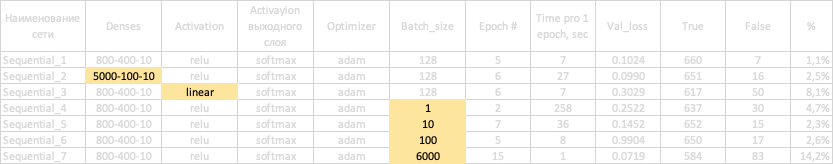

# Pro: Распознать рукописную цифру, созданную вами с помощью графического редактора

Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Collaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’)
загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.
Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).

(1, 28, 28)
(1, 784)


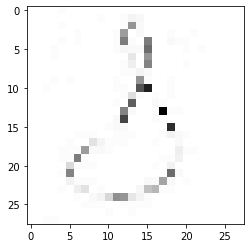

In [42]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np 


image = load_img('/content/_8.png' , 
                 target_size=(28, 28), 
                 color_mode = 'grayscale')

img_array = img_to_array(image)
img_array = img_array.reshape(1,28,28)

#Нормализация
img_array = img_array.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
img_array = img_array / 255 # делим на 255, чтобы диапазон был от 0 до 1
img_array = 1 - img_array # инвертируем 1 в 0

#Меняем формат входных картинок с 28х28 на 784х1
img_reshape = img_array.reshape(1, 784)

print(img_array.shape)
print(img_reshape.shape)

plt.imshow(img_array[0], cmap='Greys') #Отрисовка картинки
plt.show()

In [ ]:
prediction = model.predict(img_reshape) #Распознаём наш пример
prediction = np.argmax(prediction) # Получаем индекс самого большого элемента 
#(это итоговая цифра, которую распознала сеть)
print('Ответ нейросети: ' , prediction)

Ответ нейросети:  8
